In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import tqdm
%matplotlib inline

In [22]:
reviews = pd.read_html('mon_reviews.html', header=0)[0]

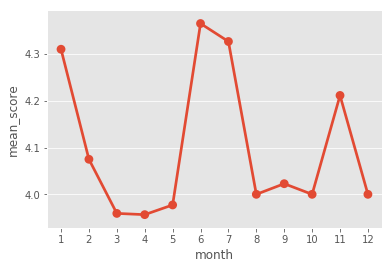

In [23]:
# stars = reviews[['date', 'stars']].sort_values(by=['date'])
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['year'], reviews['month'] = reviews['date'].dt.year, reviews['date'].dt.month
reviews_2017 = reviews[reviews['year'] == 2017]
mean_stars = reviews_2017.groupby(['year', 'month'], as_index=False)['stars'].agg({"mean_score": "mean"})
ax = sns.pointplot(x='month', y='mean_score', data=mean_stars)

In [30]:
k = 5

In [28]:
mon_users = pd.read_csv('mon_users.csv')
mon_users['ratio'] = mon_users['useful']/mon_users['review_count']

In [36]:
potential_inf = mon_users.sort_values(by='ratio', ascending=None)[:5][['id', 'ratio']]

In [38]:
potential_inf

,id,ratio
489,wXSzeF0XoUm3P9MezcVKtQ,85.159292
559,ZOAJ6tt9hRhJNl-ICdgjBA,37.531746
214,gtwM4ijo65AN4DvXdgCu_w,18.044444
88,8W4969tAJqsmzQVeCRnRZQ,16.724138
197,F_5_UNX-wrAFCXuAkBZRDw,16.696714


In [42]:
reviews[reviews['user_id'].isin(potential_inf['id'])]

,id,business_id,user_id,stars,date,text,useful,funny,cool,year,month
2630,KVfbZxZ4KhGd1km6ua0Gqg,4JNXUYY8wbaaDmk3BPzlWw,ZOAJ6tt9hRhJNl-ICdgjBA,5,2017-02-21,What an awesome restaurant with a view to die ...,17,8,14,2017,2
4321,UT22cdzgOco32SOggBzclg,4JNXUYY8wbaaDmk3BPzlWw,8W4969tAJqsmzQVeCRnRZQ,4,2017-08-05,"Stop by, Mon Ami Gabi for a quick bit to go. I...",1,0,0,2017,8
4913,yem0BXP1ZKJF7jyt-i_orA,4JNXUYY8wbaaDmk3BPzlWw,wXSzeF0XoUm3P9MezcVKtQ,4,2017-01-18,As an American who has only traveled once over...,13,11,11,2017,1
5034,Z0YzRm02CGySZVOKPRReTQ,4JNXUYY8wbaaDmk3BPzlWw,gtwM4ijo65AN4DvXdgCu_w,4,2017-04-29,Mon Ami gabi has been on my bucket list for a ...,11,8,15,2017,4
5195,_1XPTEzPVMoRkhVwOjVJ9g,4JNXUYY8wbaaDmk3BPzlWw,F_5_UNX-wrAFCXuAkBZRDw,5,2017-08-20,"If you know me with my past Vegas trips, it is...",19,13,17,2017,8


In [50]:
#reading reviews files for all 5 top restaurants
files = glob.glob('*.html')
df = pd.DataFrame()
for file in files:
    reviews = pd.read_html(file, header=0)[0]
    if df.shape[0] == 0:
        df = reviews
    else:
        df = df.append(reviews)

In [49]:
df

,id,business_id,user_id,stars,date,text,useful,funny,cool
0,-1RfHHfP3WaG0gN1v1KWLA,4JNXUYY8wbaaDmk3BPzlWw,-s3ATMWSYnjM2gIwXYkY1w,5,2016-10-10 00:00:00,Thank you Perry for checking on is during our ...,0,0,1
1,-2-LqTqh6i9FhqJNS3xrsw,4JNXUYY8wbaaDmk3BPzlWw,tDlvcvNZtgVstlEH9Cx5Eg,5,2011-02-09 00:00:00,So it was my birthday........... We were seate...,1,1,1
2,-2NfC5Dn7ebKrZwSw-X1jg,4JNXUYY8wbaaDmk3BPzlWw,Ll_jDY55b3U8QdGu4As-2A,5,2009-09-11 00:00:00,Great oysters? Check. Good bread? Check. I got...,0,0,0
3,-32pNTk6uUjML6WLaJeP9g,4JNXUYY8wbaaDmk3BPzlWw,kQlHI4rw1pbDPK-SzpkwNQ,3,2010-02-17 00:00:00,"I had higher expectation for this place, but w...",0,0,0
4,-3AEuQMW6ifRnKev2NGTZQ,4JNXUYY8wbaaDmk3BPzlWw,oY4NZbBXAw4GHgI9GmHIQg,5,2013-08-09 00:00:00,The Bf and I dined here on July 13 and had inv...,1,0,0
5,-4dHs0d1iZ5jT8SUG4n0NQ,4JNXUYY8wbaaDmk3BPzlWw,fp-G2tD50h5F0NngWbxVYA,5,2016-03-20 00:00:00,First off. AMAZING service. Our server was bot...,0,0,0
6,-535OhvuI9L0ig3Y6ZPtYg,4JNXUYY8wbaaDmk3BPzlWw,8a0GHVSVs3rSRtNIIR4rlw,3,2014-04-05 00:00:00,Kim made reservations at this place that is lo...,0,0,0
7,-5kjSo76LvDFzM0MmlkWNA,4JNXUYY8wbaaDmk3BPzlWw,llyK5_o-6L9H5QG2rcROmA,3,2012-06-26 00:00:00,Came for breakfast on a weekend with a group o...,0,0,0
8,-5r3xPLi8iUMy8PwLXVtGA,4JNXUYY8wbaaDmk3BPzlWw,G8GDmChCmteQKPkaRE1hsg,5,2013-01-14 00:00:00,"Always, always, always a good experience, no m...",0,0,0
9,-5YadFhXUsPGYa9djwClDA,4JNXUYY8wbaaDmk3BPzlWw,ZsNO1ZvPdxJOgEAjI7Psaw,4,2014-09-30 00:00:00,"Wonderful experience, great service and except...",1,0,1
